In [351]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import plotly.graph_objects as go
import re
import plotly.express as px
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

# Evaluate Generated Sequences Diversity 

The goal of this notebook is to evaluate DNA sequences disversity within a generated fasta file. 

## Motif Analysis 

First we are going to compare the sequences based on the motifs they contain, the goal is to check if they all contain the same or different motifs and see if a motif is present repeatively in a sequence. It can also give us a hint on the number of motif present in each sequences which give us an information on how relevant are the sequences we extract. 

In [256]:
a = pd.read_csv(os.environ['PDBX_UBC']+'data/Runs_GA/Run_28_11_F_10In_100It/Fimo/fimo_B/fimo.tsv',sep='\t')
a = a[:-3] #Remove Footer
pa = pd.pivot_table(a, index='sequence_name', columns='motif_id',values='matched_sequence', aggfunc='count',fill_value=0 )

database_path = os.environ['PDBX_UBC']+'data/sasha_ATAC/filter_motifs_pwm99.meme'
with open(database_path) as f:
        list_motifs_99 = re.findall(r'\b(\w*filter\w*)\b', f.read())
        
table  = pd.read_excel(os.environ['PDBX_UBC']+'data/sasha_ATAC/tableS1A.xlsx',index_col=1)
a = table.iloc[0]
table = table[1:]
table.columns = a
tdf = table.loc[list_motifs_99,['Best overall TF match','Motif consensus Sequence']]
tdf['Best overall TF match'] = tdf['Best overall TF match'].fillna('MOTIF UNKOWN')
tdf['Best overall TF match'] = tdf['Best overall TF match'].apply(lambda x: x.split('//')[0])

In [257]:
nb_unique_sequences_with_motifs =  pa.shape[0]
nb_motif_sequences = pa.sum(axis=1)
nb_motif_sequences_unique = (pa>0).sum(axis=1)

### Sequences Side 

- How many different motifs contains each generated sequences ?
- Does sequences contains a lot of repeated motifs ?
- Which are the motifs that are the fulling the sequence the more often ? 

In [367]:
tt = pd.merge(pa.T,tdf[['Best overall TF match']],left_index=True, right_index=True, how='left')
ttg = tt.groupby('Best overall TF match').sum().T

In [368]:
ttg

Best overall TF match  Bcl11a  C2H2 ZF  Ctcf  Ebf1  Eomes  Erg  Irf1  \
sequence_1                  5        0     0     0      0    0    12   
sequence_10                 5        0     0     3      0    0    17   
sequence_100                3        0     0     0      0    0     9   
sequence_1000               2        0     0    31      0    0     0   
sequence_1001               1        0     0     6      0    0     0   
sequence_1002               3        0     0    29      0    0     0   
sequence_1003               2        0     0    34      0    0     0   
sequence_1004               2        0     0    26      0    0     0   
sequence_1005               2        0     0    33      0    0     0   
sequence_1006               0        0     0     6      0    0     0   
sequence_1007               1        0     0    24      0    0     0   
sequence_1008               2        0     0     6      0    0     0   
sequence_1009               1        0     0     5      0    0     0   
sequence_101                5        0     0     0      0    0    13   
sequence_1010               1        0     0    17      0    0     0   
sequence_1011               1        0     0    22      0    0     0   
sequence_1012               1        0     0    39      0    0     0   
sequence_1013               1        0     0    39      0    0     0   
sequence_1014               0        0     0    11      0    0     0   
sequence_1015               0        0     0     6      0    0     0   
sequence_1016               0        0     0     9      0    0     0   
sequence_1017               1        0     0    14      0    0     0   
sequence_1018               0        0     0     0      0    0     0   
sequence_1019               1        0     0     7      0    0     0   
sequence_102                6        0     0     1      0    0    15   
sequence_1020               1        0     0    11      0    0     0   
sequence_1021               0        0     0    40      0    0     3   
sequence_1022               1        0     0    27      0    0     3   
sequence_1023               1        0     0    13      0    0     0   
sequence_1024               1        0     0    20      0    0     0   
...                       ...      ...   ...   ...    ...  ...   ...   
sequence_972                0        0     0     6      0    0     0   
sequence_973                0        0     0    23      0    0     0   
sequence_974                1        0     0    31      0    0     0   
sequence_975                1        0     0    15      0    0     0   
sequence_976                2        0     0    36      0    0     0   
sequence_977                1        0     0    33      0    0     0   
sequence_978                1        0     0     4      0    0     0   
sequence_979                0        0     0     8      0    0     0   
sequence_98                 5        0     0     1      0    0    16   
sequence_980                1        0     0    17      0    0     4   
sequence_981                1        0     0    37      0    0     0   
sequence_982                1        0     0    20      0    0     0   
sequence_983                0        0     0    12      0    0     0   
sequence_984                1        0     0    19      0    0     2   
sequence_985                1        0     0    28      0    0     0   
sequence_986                0        0     0    26      0    0     0   
sequence_987                0        0     0    13      0    0     0   
sequence_988                0        0     0    14      0    0     0   
sequence_989                0        0     0    18      0    0     0   
sequence_99                 5        0     0     0      0    0    15   
sequence_990                1        0     0    35      0    0     0   
sequence_991                1        0     0    25      0    0     0   
sequence_992                2        0     0    21      0    0     1   
sequence_993                1        0  

In [369]:
pa =ttg
seq_div = pd.DataFrame([pa.sum(axis=1),
                        (pa>0).sum(axis=1),
                         pa.idxmax(axis=1),
                         pa.max(axis=1)]).T
seq_div.columns = ['Number of Motifs',
                   'Number of Unique Motifs', 
                   'Maximum Occurence Motif',
                   '#Maximum Occurence']
seq_div = seq_div.astype({'#Maximum Occurence':'float',
               'Number of Motifs':'float',
               'Number of Unique Motifs':'float'})

seq_div = pd.merge(seq_div, tdf,
                   left_on = 'Maximum Occurence Motif', right_index=True, how='left')

In [370]:
seq_div

Number of Motifs  Number of Unique Motifs  \
sequence_1                 39.0                      6.0   
sequence_10                66.0                      9.0   
sequence_100               27.0                      5.0   
sequence_1000              53.0                      8.0   
sequence_1001              41.0                      8.0   
sequence_1002              56.0                      9.0   
sequence_1003              57.0                      9.0   
sequence_1004              48.0                      8.0   
sequence_1005              51.0                      7.0   
sequence_1006              31.0                      7.0   
sequence_1007              46.0                      7.0   
sequence_1008              37.0                      9.0   
sequence_1009              29.0                      8.0   
sequence_101               41.0                      5.0   
sequence_1010              37.0                      8.0   
sequence_1011              43.0                      8.0   
sequence_1012              51.0                      7.0   
sequence_1013              51.0                      7.0   
sequence_1014              31.0                      6.0   
sequence_1015              31.0                      5.0   
sequence_1016              40.0                      7.0   
sequence_1017              27.0                      6.0   
sequence_1018              22.0                      4.0   
sequence_1019              33.0                      8.0   
sequence_102               55.0                      8.0   
sequence_1020              37.0                      8.0   
sequence_1021              51.0                      7.0   
sequence_1022              44.0                      8.0   
sequence_1023              38.0                      6.0   
sequence_1024              45.0                      6.0   
...                         ...                      ...   
sequence_972               31.0                      5.0   
sequence_973               40.0                      5.0   
sequence_974               50.0                      6.0   
sequence_975               42.0                      8.0   
sequence_976               56.0                      8.0   
sequence_977               51.0                      6.0   
sequence_978               34.0                      8.0   
sequence_979               30.0                      5.0   
sequence_98                48.0                      8.0   
sequence_980               33.0                      7.0   
sequence_981               53.0                      7.0   
sequence_982               41.0                      6.0   
sequence_983               37.0                      7.0   
sequence_984               36.0                      7.0   
sequence_985               47.0                      8.0   
sequence_986               42.0                      5.0   
sequence_987               28.0                      6.0   
sequence_988               42.0                      7.0   
sequence_989               35.0                      5.0   
sequence_99                51.0                      8.0   
sequence_990               48.0                      6.0   
sequence_991               42.0                      6.0   
sequence_992               40.0                      8.0   
sequence_993               46.0                      8.0   
sequence_994               35.0                      5.0   
sequence_995               27.0                      7.0   
sequence_996               48.0                      8.0   
sequence_997               34.0                      8.0   
sequence_998               36.0                      7.0   
sequence_999               42.0                      7.0   

              Maximum Occurence Motif  #Maximum Occurence  \
sequence_1                      Sfpi1                14.0   
sequence_10                     Sfpi1                22.0   
sequence_100                    Sfpi1                10.0   
sequence_1000                    Ebf1             

Are the sequences containing diverse motifs of repeating similar motifs

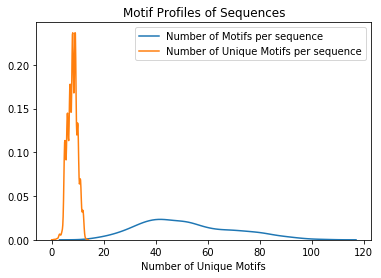

In [373]:
sns.distplot(seq_div['Number of Motifs'], label='Number of Motifs per sequence', hist=False)
sns.distplot(seq_div['Number of Unique Motifs'],
             label='Number of Unique Motifs per sequence', hist=False)
plt.title('Motif Profiles of Sequences')
plt.legend()
plt.show();

Which are the motifs that are the more often prevalent in sequences, and how many times they appear in the sequences in those cases ? 

In [279]:
seq_div.groupby('Best overall TF match').agg({'Maximum Occurence Motif':'count',
                                              '#Maximum Occurence':'mean'})

Maximum Occurence Motif  #Maximum Occurence
Best overall TF match                                             
Bcl11a                                      83            5.783133
Ebf1                                      2871           13.717172
Irf1                                       116            6.568966
Pax5                                         1            3.000000
Pou2f2                                      57            5.017544
Pouf2f                                       3            4.000000
Pu.1                                       534            8.674157
Sfpi1                                      651            5.357911
Sfpi1/Sfpib                                  7            5.571429
Tbx21                                       44            3.659091
Tcf3                                        92            5.043478
Zeb1                                        23            5.565217

What are the combinations of motifs we observe in the sequences ? Are they really different accross sequences ? 
Use Mutal Information ?

### Motif Side

- In how many sequences each motif appear ?

    Every filter motif seem to appear between 90% and 5% of the sequences.If we group to have understandable motifs names this numbers go higher because we group several filters to form one motif. 
    
    
- How many time by sequence a motif appear ? Can we think that some sequences contain only one motif in loop ? 

    In general fliter motifs appears between 1 and 5 times when they appear in a sequence but some of the motifs like EBF1 or SPI1 appears more time ( up to 35 time for filter 260 ) in some sequence, which is quite weird. A previously, when we group by motif names this go higher but it is hard to know if it is because each motif is matched several time. 
    
- Are all the sequences containing the **same motifs** ?

    Looking at the repartion of unique match per sequence, seems like all the sequences doesn't contains the same motifs but they also seem to share a base of "common motif: that occurs a lot ( As some motif appears in 90% of sequences ). Accorting to the "Motif Profiles of Sequence" each of the sequence will select between 10-20 different filters from this pool of ~40 and place them, sometimes several time in the sequences. We can interpret the 'Proportion of unique sequence containing the motif' as the chances to be selected in this first pool $P(Select_j)$. And then the distribution of the Number of Repetition when occuring in sequence as the nchance to appear several time $P(X_j|Select_j)$. 
    
    
- Are the motif that appear a lot particularly important for the model ?

    That's something we verified a also in the scatter plot with the dots and the motif importance from AI-TAC, but that is interesting to verify that very important motifs with really strong scores in AI-TAC like EBF1, IRF1 or SPI1 are very often present and repeated withing the sequences. Something even more interesting is that EBF1 is super present and repeated but didn't have a super high score in Basset-E importance score whcih was evaluating the importance by adding and the motif to random sequences, maybe the fact that it is present a lot and so important for AI-TAC model show that EBF1 work closely with other motifs and that it's combinaison with others raise the score.  

In [258]:
motif_div = pd.DataFrame([(pa>0).sum(axis=0),
                         pa.sum(axis=0),
                         pa.max(axis=0),
                         pa[pa>0].min(axis=0)]).T
motif_div.columns = ['#Unique Occurence',
                       '#Total Occurence', 
                       'Max #Occ insq',
                       'Min #Occ insq']
motif_div['Average #Occ insq'] = motif_div['#Total Occurence']/motif_div['#Unique Occurence']

motif_div = pd.merge(motif_div, tdf,
                   left_index=True, right_index=True, how='left')
motif_div = motif_div.sort_values(by='Best overall TF match')

In [358]:
fig = go.Figure()
fig.update_layout(title = 'Proportion of unique sequence containing the motif')
fig.add_trace(go.Bar(x = motif_div.index,
                 y = motif_div['#Unique Occurence']/nb_unique_sequences_with_motifs,
                 hovertext=motif_div['Best overall TF match']))

In [303]:
fig = go.Figure()
fig.update_layout(title="Number of repetition when occuring in sequence")
for c in pa.columns :
    fig.add_trace(go.Box(y=pa[pa>0][c],
                         name=c, showlegend=False,
                         hovertext=table.loc[c]['Best overall TF match']))
fig.show()

In [268]:
tt = pd.merge(pa.T,tdf[['Best overall TF match']],left_index=True, right_index=True, how='left')
ttg = tt.groupby('Best overall TF match').sum().T
motif_div_tt = pd.DataFrame([(ttg>0).sum(axis=0),
                         ttg.sum(axis=0),
                         ttg.max(axis=0),
                         ttg[ttg>0].min(axis=0)]).T
motif_div_tt.columns = ['#Unique Occurence',
                       '#Total Occurence', 
                       'Max #Occ insq',
                       'Min #Occ insq']

In [281]:
fig = go.Figure()
fig.update_layout(title="Proportion of unique sequences containing the motif")
fig.add_trace(go.Bar(x = motif_div_tt.index,
                 y=motif_div_tt['#Unique Occurence']/nb_unique_sequences_with_motifs))

In [271]:
fig = go.Figure()
fig.update_layout(title="Number of repetition when occuring in sequence")
for c in ttg.columns :
    fig.add_trace(go.Box(y=ttg[ttg>0][c], name=c, showlegend=False))
fig.show()

## Motif Interaction

Something interesting outside the importance of each motif is how several motif interact together to increase the activations for one cell type, we know that such interaction exist and we should find them within or dataset. 

For that we can use Mutal Information between each motif, comparing $p(X_a,X_b)$ and $p(X_a)p(X_b)$

In [319]:
pab = (pa>0).astype(int)

In [330]:
mu = pd.DataFrame(np.zeros((len(pab.columns), len(pab.columns))))
mu.columns = pab.columns
mu.index = pab.columns
for c1 in pab.columns :
    for c2 in pab.columns :
        mu.loc[c1,c2] = mutual_info_score(pab[c1].to_numpy(), pab[c2].to_numpy())

In [334]:
 mutual_info_score(pab['filter106'].to_numpy(), pab['filter106'].to_numpy())

0.5836711650973272

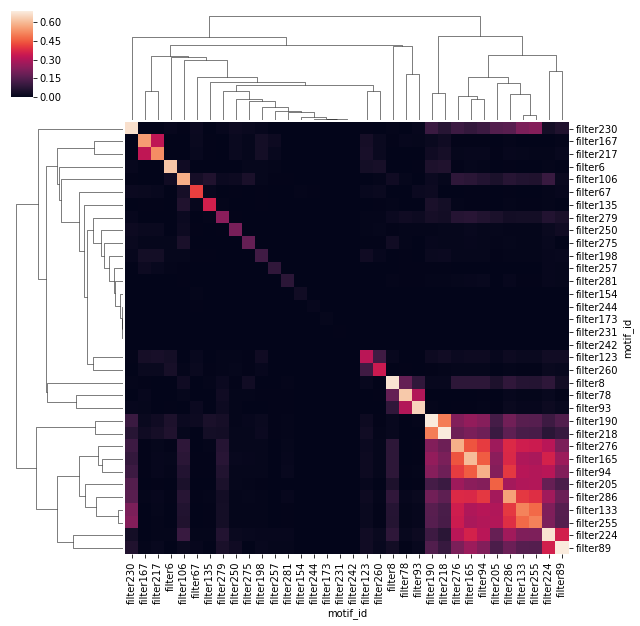

In [335]:
sns.clustermap(mu)

In [353]:
ttgb = (ttg>0).astype(int)

In [356]:
mu_ttgb = pd.DataFrame(np.zeros((len(ttgb.columns), len(ttgb.columns))))
mu_ttgb.columns = ttgb.columns
mu_ttgb.index = ttgb.columns
for c1 in ttgb.columns :
    for c2 in ttgb.columns :
        mu_ttgb.loc[c1,c2] = mutual_info_score(ttgb[c1].to_numpy(), ttgb[c2].to_numpy())

In [344]:
mutual_info_score(ttgb['Ebf1'].to_numpy(), ttgb['Ebf1'].to_numpy())

0.2462234824529726

In [350]:
(ttgb['Ebf1'].sum()/nb_unique_sequences_with_motifs)*np.log10(nb_unique_sequences_with_motifs/ttgb['Ebf1'].sum())

0.028164086014259827

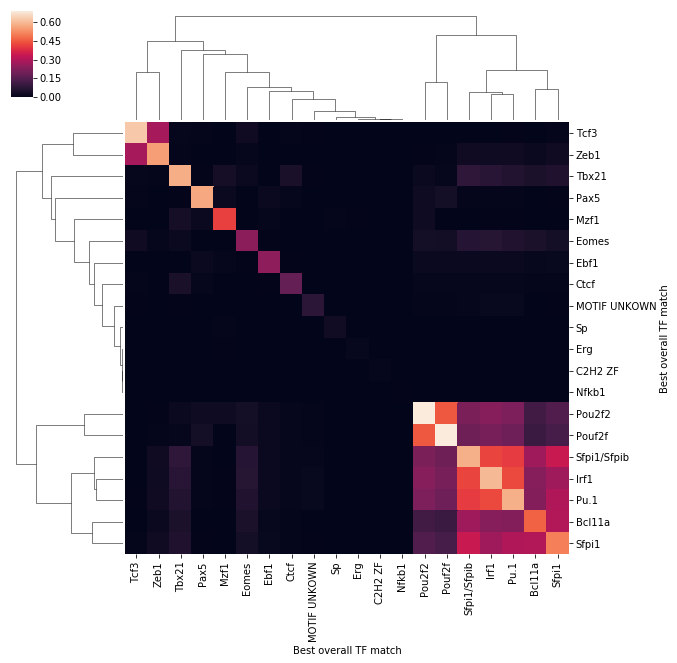

In [357]:
sns.clustermap(mu_ttgb)